In [ ]:
"""
Use movie_data_general_cleaned to build a basic Linear Regression model for general movies.

functions used:
get_Xy(df) from model.py
get_score(X_train,X_val,y_train,y_val) from model.py

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

import patsy
import scipy.stats as stats

import sys
sys.path.append('/Users/katiehuang/Documents/metis/projects/onl_ds5_project_2/py')
import importlib
from model import *

### Separate columns into target candidates, continuous features, categorical features

In [2]:
# Load the cleaned complete data
all_df = pd.read_pickle('../data/movie_data_general_cleaned')

In [3]:
con_feature = ['budget','runtime','release_year']
cat_feature = ['MPAA','genre','distributor','language','country','keywords']
target_candidate = ['opening_weekend_usa','gross_usa','gross_world','rating','vote']

In [4]:
# Choose only the continuous variables for now
c_movie_df = all_df[['opening_weekend_usa'] + con_feature].copy()

### Baseline Model
Only consider the continuous predictors and use 'opening_weekend_usa' as target.

In [5]:
# Input: whole df
# Output: features_df(X) and target_Series(y)

X, y = get_Xy(c_movie_df)

In [6]:
# Separate X, y into train/validation/test sets (60/20/20)
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

In [7]:
%run -i "../py/model.py"


Train R^2 score was: 0.5158105402526112
Validation R^2 score was: 0.48979529212513906
RMSE: 10.87 



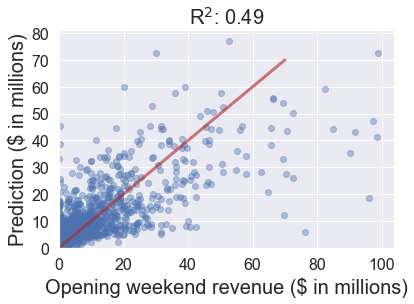

In [8]:
# Input: X_train,X_val,y_train,y_val
# lr_model = LinearRegression()
# Output: Train R^2, Validation R^2, RMSE, coefficcients, actual vs prediction plot
# Return: plot, lr_model,y_pred
fig,lr,y_pred = get_score(X_train,X_val,y_train,y_val)

In [9]:
fig.savefig('../plot/lr_prediction.pdf', bbox_inches='tight', transparent = True)

### Residuals

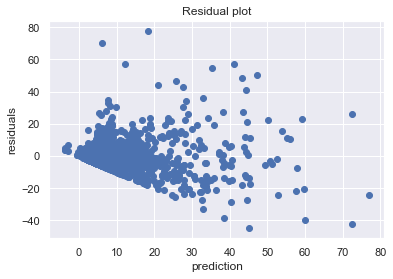

In [10]:
res = y_val - y_pred
plt.scatter(y_pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");

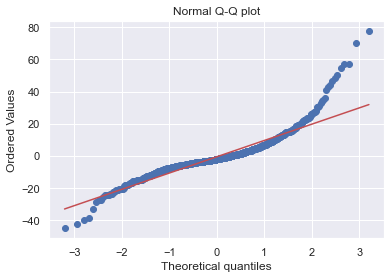

In [11]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [12]:
# right skew/ heavily tailed

### Cross-validation

In [ ]:
# Will not use X_test, y_test
lr = LinearRegression()

X, y = get_Xy(c_movie_df)

X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=21)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

# mean of val_score
print(f"Mean of validation score is: {np.mean(result):.2f} +- {np.std(result):.2f}")
print("All validation scores are", result)